In [2]:
import pandas as pd
import sys
import os, glob, sys
%load_ext autoreload
sys.path.append("/home/ishah/ipynb/ml-tox/src")

from mltox.db.mongo import *
from mltox.db.bc import *
from mltox.db.bio import *
from mltox.db.graph_utils import *
from mltox.ml.visualization import *
from mltox.ml.attentive_fp_weights import *
from mltox.ml.ml_graph_classifier_oop import *
from mltox.ml.graph_plot import *
import deepchem as dc
import random
import torch
import numpy as np

from openTSNE import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


Skipped loading some Jax models, missing a dependency. No module named 'haiku'


In [3]:
%autoreload 2

In [4]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

np.random.get_state()[1][0]

0

In [19]:
# PREFIX = 'ATG'

# dataset, assay_list = get_dataset(PREFIX)  

# filtered_list = [a for a in assay_list if "PPAR" in a]

# print(filtered_list)
def keepChem(DSa):
    Keep=[]
    for i,v in enumerate(DSa.X):
        #print(i.num_nodes)
        try:
            n = v.num_nodes
        except:
            print(i)
        else:
            Keep.append(i)
    
    return DSa.select(Keep)
    
    

In [45]:
MODEL

NameError: name 'MODEL' is not defined

In [8]:
ER1 = pd.read_csv('/home/ishah/ipynb/ml-tox/data/bio/ER-pmi.csv')

In [17]:
ER1_pos = ER1[(ER1.er_class.isin([0,1])) & (ER1.ESR1_coc>=100) & (ER1.er_class==1)]
X=ER1_pos.sort_values('ESR1_pmi',ascending=False).head(10)
SID_pos = X.dtxsid.tolist()
X

,dtxsid,refchem_agonist,refchem_antagonist,auc_agonist,er_class,chemical,ESR1_pmi,ESR2_pmi,ESRRA_pmi,ESRRB_pmi,ESRRG_pmi,ESR1_coc,ESR2_coc,ESRRA_coc,ESRRB_coc,ESRRG_coc,n_chem
0,DTXSID8022377,moderate,NaN,1.060,1.0,Alfatradiol,0.426793,0.377710,0.000000,0.000000,0.000000,157,16,0,0,0,485
3,DTXSID3020465,strong,inactive,0.943,1.0,Diethylstilbestrol,0.375444,0.296599,0.351990,0.213453,0.000000,313,22,7,5,0,2295
12,DTXSID5022308,weak,inactive,0.538,1.0,Genistein,0.364032,0.387164,0.216927,0.109817,0.000000,757,141,4,4,0,8689
17,DTXSID7020182,weak,inactive,0.450,1.0,Bisphenol A,0.337439,0.284657,0.197432,0.090322,0.389908,774,69,4,4,28,11745
1,DTXSID5020576,strong,inactive,1.000,1.0,Ethinyl estradiol,0.324533,0.000000,0.150614,0.052318,0.000000,363,0,1,1,0,4914
18,DTXSID9022310,NaN,NaN,0.440,1.0,Daidzein,0.324532,0.360391,0.222758,0.120244,0.314071,275,56,2,2,5,3402
6,DTXSID4022367,moderate,NaN,0.807,1.0,Estrone,0.322899,0.261384,0.146372,0.000000,0.000000,378,29,1,0,0,5278
21,DTXSID9022364,very weak,inactive,0.400,1.0,Androstanolone,0.295642,0.316681,0.000000,0.119701,0.161047,306,52,0,3,1,5404
7,DTXSID9022366,NaN,NaN,0.786,1.0,Estriol,0.262914,0.252645,0.000000,0.000000,0.000000,103,12,0,0,0,1966
56,DTXSID8024523,NaN,NaN,0.183,1.0,Androstenedione,0.219946,0.214986,0.000000,0.099073,0.000000,139,16,0,2,0,4789


In [18]:
ER1_neg = ER1[(ER1.er_class.isin([0])) & (ER1.n_chem>=1e3) & (ER1.ESR1_pmi<=0) & (ER1.er_class==0)]
X = ER1_neg.sort_values('ESR1_pmi',ascending=False).head(10)
SID_neg = X.dtxsid.tolist()
X

,dtxsid,refchem_agonist,refchem_antagonist,auc_agonist,er_class,chemical,ESR1_pmi,ESR2_pmi,ESRRA_pmi,ESRRB_pmi,ESRRG_pmi,ESR1_coc,ESR2_coc,ESRRA_coc,ESRRB_coc,ESRRG_coc,n_chem
288,DTXSID0025816,NaN,NaN,0.00766,0.0,Oxalic Acid,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,2761
735,DTXSID0021206,NaN,NaN,0.00000,0.0,Propylene Glycol,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,6029
1241,DTXSID6021666,NaN,NaN,0.00000,0.0,Myristic Acid,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,2601
1230,DTXSID0020232,NaN,NaN,0.00000,0.0,Caffeine,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,20332
1214,DTXSID5021251,NaN,NaN,0.00000,0.0,Saccharin,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,2433
1206,DTXSID1020855,NaN,NaN,0.00000,0.0,Methyl parathion,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1113
1205,DTXSID9021392,NaN,NaN,0.00000,0.0,Triethanolamine,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1237
1203,DTXSID8025595,NaN,NaN,0.00000,0.0,"N,N'-Methylenebisacrylamide",0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1262
1192,DTXSID9020249,NaN,NaN,0.00000,0.0,Carbofuran,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1084
1170,DTXSID4042416,NaN,NaN,0.00000,0.0,Sodium tetradecyl sulfate,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,2385


In [24]:
DAT='/home/ishah/ipynb/ml-tox/data/bio/'
CH_ATG = pd.read_csv(DAT+'chm-atg.csv')
Y_names = CH_ATG.columns[2:]
CH_ATG_train = CH_ATG[~CH_ATG.dsstox_sid.isin([SID_neg+SID_pos])]

DS_train = dc.data.NumpyDataset(CH_ATG_train.smiles,CH_ATG_train.iloc[:,2:])
FT = dc.trans.FeaturizationTransformer(DS_train, dc.feat.MolGraphConvFeaturizer(use_edges=True))
DS_train = FT.transform(DS_train)
DS_train = keepChem(DS_train)

CH_ATG_test = CH_ATG[CH_ATG.dsstox_sid.isin([SID_neg+SID_pos])]

DS_test = dc.data.NumpyDataset(CH_ATG_test.smiles,CH_ATG_test.iloc[:,2:])
FT = dc.trans.FeaturizationTransformer(DS_test, dc.feat.MolGraphConvFeaturizer(use_edges=True))
DS_test = FT.transform(DS_test)
DS_test = keepChem(DS_test)



Failed to featurize datapoint 244, [Br-].[Br-].[Ca+2]. Appending empty array
Exception message: tuple index out of range
Failed to featurize datapoint 272, [Cl-].[Cl-].[Cl-].[Yb+3]. Appending empty array
Exception message: tuple index out of range
Failed to featurize datapoint 913, [Cl-].[Cl-].[Zn+2]. Appending empty array
Exception message: tuple index out of range
Failed to featurize datapoint 932, [I-].[Na+]. Appending empty array
Exception message: tuple index out of range
Failed to featurize datapoint 1505, [Cl-].[Cl-].[Pd+2]. Appending empty array
Exception message: tuple index out of range
Failed to featurize datapoint 1769, [Cl-].[Cl-].[Hg+2]. Appending empty array
Exception message: tuple index out of range
Failed to featurize datapoint 1979, [Cu+].[I-]. Appending empty array
Exception message: tuple index out of range
[23:08:32] Explicit valence for atom # 0 O, 3, is greater than permitted
Failed to featurize datapoint 2576, None. Appending empty array
Exception message: Pyth

244
272
913
932
1505
1769
1979
2576
2669
3040
3294
3341


/opt/miniconda3/envs/dl/lib/python3.8/site-packages/deepchem/feat/base_classes.py:323: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(features)


Index(['ATG_AP_1_CIS', 'ATG_AP_2_CIS', 'ATG_AR_TRANS', 'ATG_Ahr_CIS',
       'ATG_BRE_CIS', 'ATG_CAR_TRANS', 'ATG_CMV_CIS', 'ATG_CRE_CIS',
       'ATG_C_EBP_CIS', 'ATG_DR4_LXR_CIS', 'ATG_DR5_RAR_CIS', 'ATG_E2F_CIS',
       'ATG_EGR_CIS', 'ATG_ERE_CIS', 'ATG_ERRa_TRANS', 'ATG_ERRg_TRANS',
       'ATG_ERa_TRANS', 'ATG_E_Box_CIS', 'ATG_Ets_CIS', 'ATG_FXR_TRANS',
       'ATG_FoxA2_CIS', 'ATG_FoxO_CIS', 'ATG_GATA_CIS', 'ATG_GLI_CIS',
       'ATG_GRE_CIS', 'ATG_GR_TRANS', 'ATG_HIF1a_CIS', 'ATG_HNF4a_TRANS',
       'ATG_HNF6_CIS', 'ATG_HSE_CIS', 'ATG_IR1_CIS', 'ATG_ISRE_CIS',
       'ATG_LXRa_TRANS', 'ATG_LXRb_TRANS', 'ATG_MRE_CIS', 'ATG_M_06_CIS',
       'ATG_M_06_TRANS', 'ATG_M_19_CIS', 'ATG_M_19_TRANS', 'ATG_M_32_CIS',
       'ATG_M_32_TRANS', 'ATG_M_61_CIS', 'ATG_M_61_TRANS', 'ATG_Myb_CIS',
       'ATG_Myc_CIS', 'ATG_NFI_CIS', 'ATG_NF_kB_CIS', 'ATG_NRF1_CIS',
       'ATG_NRF2_ARE_CIS', 'ATG_NURR1_TRANS', 'ATG_Oct_MLP_CIS',
       'ATG_PBREM_CIS', 'ATG_PPARa_TRANS', 'ATG_PPARd_TRANS',
    

In [43]:
MY_ASSAY = 'ATG_ERa_TRANS'


assay_list = CH_ATG.columns[2:]

n_tasks = train_dataset.y.shape[1]
model = AttentiveFPModelWeights(mode='classification', 
                                n_tasks=n_tasks,
                                graph_feat_size=200,
                                batch_size=16, 
                                num_layers = 2,
                                num_timesteps = 2,
                                learning_rate=0.001,
                                model_dir=f'{os.getcwd()}/tmp_models/tmp_afp_model/'
                                
                                )


TypeError: super(type, obj): obj must be an instance or subtype of type

In [38]:
!CUDA_VISIBLE_DEVICES='0'
!export CUDA_VISIBLE_DEVICES
os.getenv('CUDA_VISIBLE_DEVICES')

In [ ]:
plotter = GraphModelPlotter(model,assay_list,(None,DS_train),12)
y_pred, results = plotter.run()


In [42]:
plotter.model.device

device(type='cuda')

In [7]:
from rdkit.Chem import PandasTools
TSCA_dtx = PandasTools.LoadSDF('TSCA_JUL22_v3_QSAR-ready_kek.sdf')[['ID']].rename(columns={'ID':'DTXSID'})

In [ ]:
import deepchem as dc
TSCA_dtx['smiles'] = TSCA_dtx['DTXSID']

featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
smiles = TSCA_dtx['smiles'].tolist()

X = featurizer.featurize(smiles)

In [6]:

# df = pd.DataFrame()
# df['DTXSID'] = dataset[0].X
# dataset[0].y
# assay_n = plotter.assay_list.index(MY_ASSAY)
# df['label'] = dataset[0].y[:,assay_n]

# #
# df.to_pickle(f'DTX_{MY_ASSAY}.pkl')

In [12]:
model = AttentiveFPModelWeights(
                            mode='classification', 
                            n_tasks=n_tasks,
                            graph_feat_size=200,
                            batch_size=16, 
                            num_layers = 2,
                            num_timesteps = 2,
                            learning_rate=0.001,
                            model_dir=f'{os.getcwd()}/tmp_models/tmp_afp_model/',
                            )
plotter = GraphModelPlotter(model,assay_list,dataset,12)
y_pred, results = plotter.run()



Training model...


/home/madams01/anaconda3/envs/tflow_dc_edit/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Done.


In [31]:
preds, embeds, df = plotter.predict_unlabeled(TSCA_dtx.iloc[0:1000])

In [42]:
train_embeds = plotter.get_embeds()[0]

In [43]:
def leverage(train_set,test_set):
    Ht = test_set.dot(np.linalg.inv(train_set.T.dot(train_set)).dot(test_set.T))
    hat_diag = np.diagonal(Ht)
    return hat_diag


In [44]:
lev = leverage(train_embeds,embeds)

In [49]:
p = train_embeds.shape[1]
n = train_embeds.shape[0]

threshold = 3*(p/n)

threshold

0.17526144969347277

In [71]:
df = df[['DTXSID']]

In [ ]:
for i,asy in enumerate(assay_list):
    df[asy] = preds[:,0][:,1]

In [73]:
df

,DTXSID,ATG_AP_1_CIS,ATG_AP_2_CIS,ATG_AR_TRANS,ATG_Ahr_CIS,ATG_BRE_CIS,ATG_CAR_TRANS,ATG_CMV_CIS,ATG_CRE_CIS,ATG_C_EBP_CIS,...,ATG_Sp1_CIS,ATG_TAL_CIS,ATG_TA_CIS,ATG_TCF_b_cat_CIS,ATG_TGFb_CIS,ATG_THRa1_TRANS,ATG_VDRE_CIS,ATG_VDR_TRANS,ATG_Xbp1_CIS,ATG_p53_CIS
0,DTXSID3060164,0.666125,0.666125,0.666125,0.666125,0.666125,0.666125,0.666125,0.666125,0.666125,...,0.666125,0.666125,0.666125,0.666125,0.666125,0.666125,0.666125,0.666125,0.666125,0.666125
1,DTXSID7060837,0.309273,0.309273,0.309273,0.309273,0.309273,0.309273,0.309273,0.309273,0.309273,...,0.309273,0.309273,0.309273,0.309273,0.309273,0.309273,0.309273,0.309273,0.309273,0.309273
2,DTXSID9025879,0.494100,0.494100,0.494100,0.494100,0.494100,0.494100,0.494100,0.494100,0.494100,...,0.494100,0.494100,0.494100,0.494100,0.494100,0.494100,0.494100,0.494100,0.494100,0.494100
3,DTXSID2026282,0.488521,0.488521,0.488521,0.488521,0.488521,0.488521,0.488521,0.488521,0.488521,...,0.488521,0.488521,0.488521,0.488521,0.488521,0.488521,0.488521,0.488521,0.488521,0.488521
4,DTXSID4052188,0.468669,0.468669,0.468669,0.468669,0.468669,0.468669,0.468669,0.468669,0.468669,...,0.468669,0.468669,0.468669,0.468669,0.468669,0.468669,0.468669,0.468669,0.468669,0.468669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,DTXSID5020283,0.317815,0.317815,0.317815,0.317815,0.317815,0.317815,0.317815,0.317815,0.317815,...,0.317815,0.317815,0.317815,0.317815,0.317815,0.317815,0.317815,0.317815,0.317815,0.317815
996,DTXSID10885269,0.185846,0.185846,0.185846,0.185846,0.185846,0.185846,0.185846,0.185846,0.185846,...,0.185846,0.185846,0.185846,0.185846,0.185846,0.185846,0.185846,0.185846,0.185846,0.185846
997,DTXSID2067329,0.613106,0.613106,0.613106,0.613106,0.613106,0.613106,0.613106,0.613106,0.613106,...,0.613106,0.613106,0.613106,0.613106,0.613106,0.613106,0.613106,0.613106,0.613106,0.613106
998,DTXSID60883492,0.541515,0.541515,0.541515,0.541515,0.541515,0.541515,0.541515,0.541515,0.541515,...,0.541515,0.541515,0.541515,0.541515,0.541515,0.541515,0.541515,0.541515,0.541515,0.541515


In [74]:
df['Leverage'] = lev

/tmp/ipykernel_3667261/1802166709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Leverage'] = lev


In [76]:
df.to_pickle('Attentive_FP_ATG_TSCA_1000_leverage.pkl')

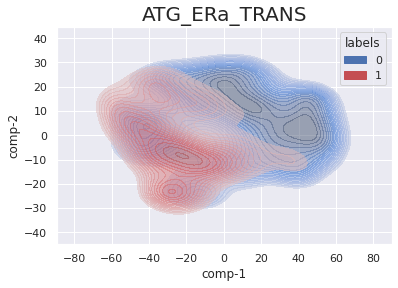

In [9]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9,7)})
g = plotter.plot_kde(MY_ASSAY)

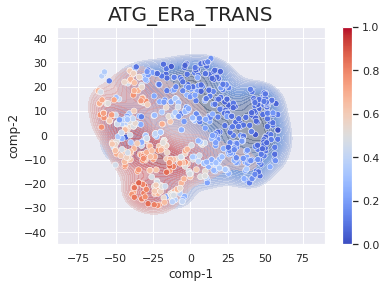

In [10]:
plotter.plot_train_test(MY_ASSAY)

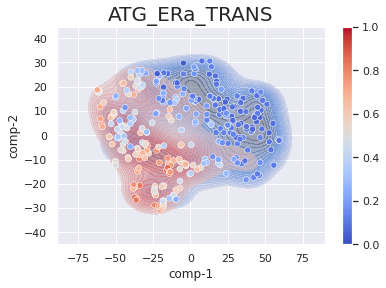

In [11]:
plotter.plot_train_unlabeled(MY_ASSAY)

In [12]:
def plot_points(df, dtxsids):
    """
    Parameters
    ----------

    df: pd.DataFrame

    dtxsids: list[str]


    """
    df = df[df['DTXSID'].isin(dtxsids)]

    cols = list(df.columns)

    n = len([col for col in cols if "dtxsid neighbor" in col])

    preds = df[f'probability active {MY_ASSAY}'].values[0]
    print('Probability test chemical is active:', preds)


    # Training point
    sum_labels = 0
    df_neighbor = pd.DataFrame(columns=['comp-1', 'comp-2', 'train label'])
    for i in range(n):
        train_label = df[f'train label neighbor {i+1}'].values[0]
        x = df[f'comp-1 neighbor {i+1}'].values[0]
        y = df[f'comp-2 neighbor {i+1}'].values[0]
        df_neighbor.loc[i] = [x,y,train_label]
        sum_labels+= train_label

    train_label = df_neighbor['train label'].values
    

    g1 = sns.scatterplot(data = df_neighbor,x='comp-1',y='comp-2',c=train_label,cmap='coolwarm',alpha=0.8,s=300,vmin=0, vmax=1,marker='x') 

    g2 = sns.scatterplot(data = df,x='comp-1',y='comp-2',c=preds,cmap='coolwarm',alpha=1,s=300,vmin=0, vmax=1,edgecolor='yellow',marker='*')

    # Predicted
    

    print(f'{sum_labels} / {n} Nearest Neighbor Training Chemicals are active ')



    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=None)
    sm.set_array([])
    g2.figure.colorbar(sm)
    g2.get_legend().remove()


    return df

In [13]:
df_table = plotter.make_table(MY_ASSAY,mode='all',compare=True,n_neighbors=5)


In [14]:
df_table.sort_values(by=[f'probability active {MY_ASSAY}'])

,DTXSID,probability active ATG_ERa_TRANS,predicted label ATG_ERa_TRANS,probability label ATG_ERa_TRANS,comp-1,comp-2,distance neighbor 1,train index neighbor 1,train dtxsid neighbor 1,train label neighbor 1,...,train dtxsid neighbor 4,train label neighbor 4,comp-1 neighbor 4,comp-2 neighbor 4,distance neighbor 5,train index neighbor 5,train dtxsid neighbor 5,train label neighbor 5,comp-1 neighbor 5,comp-2 neighbor 5
297,DTXSID4020822,0.036573,0,0.963427,-4.678761,29.768423,1.130919e-06,1121,DTXSID4020822,0,...,DTXSID6034764,1,-3.789957,28.778740,2.002342,436,DTXSID1032642,0,-3.533508,28.911938
255,DTXSID50886311,0.041424,0,0.958576,-22.199368,25.399520,3.209829e+00,1278,DTXSID4040765,0,...,DTXSID7041467,0,-18.512330,23.898449,3.699903,826,DTXSID2048167,0,-15.405945,23.002734
125,DTXSID8074576,0.055913,0,0.944087,23.306294,13.700547,1.640723e+00,1729,DTXSID6022927,0,...,DTXSID6023999,0,24.782299,13.369321,2.005739,0,DTXSID0020232,1,24.476107,14.879171
12,DTXSID6074592,0.060097,0,0.939903,46.511750,7.419930,3.755009e-01,333,DTXSID1022001,0,...,DTXSID1020223,0,45.889618,6.871064,0.640410,677,DTXSID2026789,0,45.320893,7.072196
221,DTXSID4020119,0.062246,0,0.937754,-17.938615,19.859267,2.446445e+00,2409,DTXSID8037596,0,...,DTXSID3024316,0,-17.464409,20.085961,2.734553,1255,DTXSID4034528,0,-7.080427,25.132638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,DTXSID20957284,0.831276,1,0.831276,-36.273100,-26.727540,7.952320e-01,1370,DTXSID4048193,0,...,DTXSID7041544,1,-26.491309,-27.615467,1.359764,1790,DTXSID6027052,1,-36.691177,-25.647114
162,DTXSID2020216,0.844761,1,0.844761,-37.353275,-25.618451,1.685874e-07,565,DTXSID2020216,1,...,DTXSID2026602,0,-36.957994,-25.626806,0.593474,1790,DTXSID6027052,1,-36.691177,-25.647114
79,DTXSID0059665,0.844975,1,0.844975,-16.060295,-14.360723,1.536785e-01,2696,DTXSID9044164,1,...,DTXSID2027414,0,-15.821020,-13.906606,1.305897,2175,DTXSID7042273,1,-16.115734,-15.274509
148,DTXSID0064046,0.853312,1,0.853312,-36.896347,-25.634951,4.757847e-04,673,DTXSID2026602,0,...,DTXSID2020216,1,-37.304281,-25.640002,0.549781,482,DTXSID1041502,0,-37.500015,-25.553395


In [15]:
df_table.iloc[:,0:3].to_pickle('tsca_graph_preds.pkl')

In [16]:
# df = plotter._get_assay_data(MY_ASSAY,True)

assay_n = plotter.assay_list.index(MY_ASSAY)
preds = plotter.test_predictions[:,assay_n][:,1]

train_dtxset, test_dtxset = split_data(plotter.dtxset,seed=plotter.seed)

df = pd.DataFrame()
df['DTXSID'] = test_dtxset.X
df['test_label'] = test_dtxset.y[:,assay_n]
df['predicted prob active'] = preds

In [17]:
def label(X):
    if X > 0.5:
        return 1
    if X < 0.5:
        return 0

Probability test chemical is active: 0.06778554
0 / 5 Nearest Neighbor Training Chemicals are active 


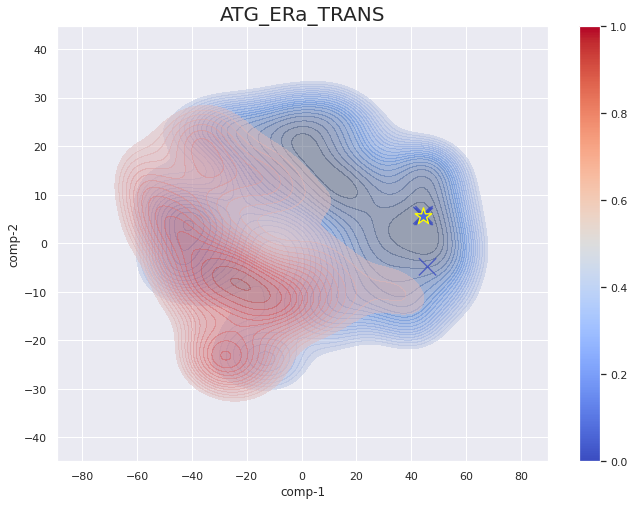

In [18]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11,8)})
g = plotter.plot_kde(MY_ASSAY)
dtxsids = ['DTXSID1065687']
new_df = plot_points(df_table,dtxsids)

#decision boundaries ---- 

DB5 = openMongo(db='genra_dev_v5',host='pb.epa.gov',auth=True)
name = DB5.compounds.find_one({'dsstox_sid':dtxsids[0]})['name']



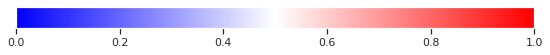

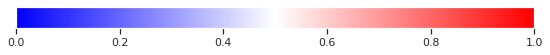

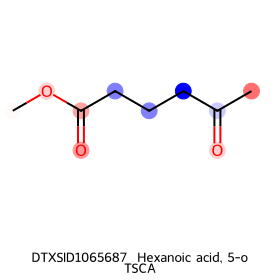

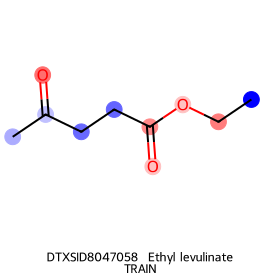

In [19]:
tsca_dtx = new_df['DTXSID'].values[0]

train_dtx  = new_df['train dtxsid neighbor 1'].values[0]

mol, aw, svg = draw_mol_weights(tsca_dtx,model,'TSCA',1)
mol, aw, svg2 = draw_mol_weights(train_dtx,model,'TRAIN',1)

display(SVG(svg))
display(SVG(svg2))



In [20]:
# Assay_list = get_bio_assays(DB5.toxcast_assays)
# prefixes = set([i.split('_')[0] for i in Assay_list])


# for prefix in prefixes:
#     if prefix:
#         subset_assays = [i for i in Assay_list if i.startswith(prefix)]
#     else:
#         subset_assays = Assay_list

#     if os.path.exists(f'db_datasets/{prefix}_x_with_dtx.pkl') and os.path.exists(f'db_datasets/{prefix}_y_with_dtx.pkl'):
#         X = pd.read_pickle(f'db_datasets/{prefix}_x_with_dtx.pkl')
#         Y = pd.read_pickle(f'db_datasets/{prefix}_y_with_dtx.pkl')
#     else:
#         X,Y = get_task_data(subset_assays,keep_dtx=True)
#         X.to_pickle(f'db_datasets/{prefix}_x_with_dtx.pkl')
#         Y.to_pickle(f'db_datasets/{prefix}_y_with_dtx.pkl')

In [21]:
for assay in plotter.assay_list:
    preds = plotter.get_unlabeled_assay_data(assay)
df = plotter.get_unlabeled_assay_data(MY_ASSAY)

In [22]:
pred_cols = [col for col in df.columns if "probability active" in col]

df_preds = df[pred_cols]



/home/madams01/anaconda3/envs/tflow_dc_edit/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 59.0, 'ASSAY')

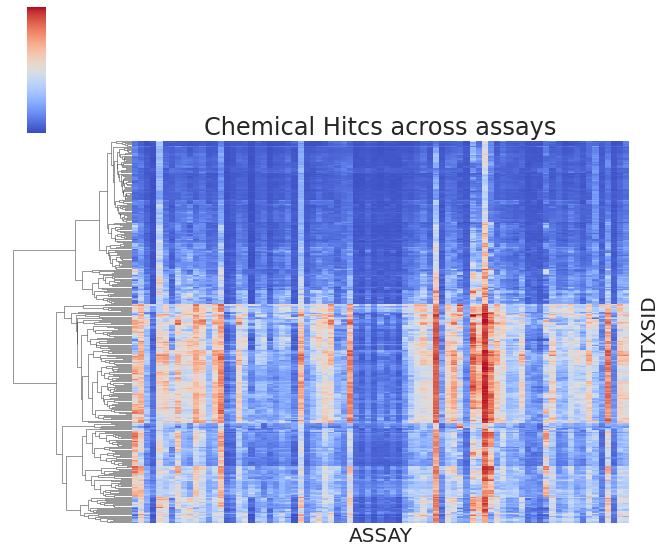

In [30]:
df_preds.sum(axis=0).sort_values()

probability active ATG_M_19_TRANS       20.472445
probability active ATG_M_06_TRANS       21.260874
probability active ATG_M_61_TRANS       21.629269
probability active ATG_AR_TRANS         22.995399
probability active ATG_ERRa_TRANS       25.123196
                                          ...    
probability active ATG_PXR_TRANS       155.842773
probability active ATG_PPARg_TRANS     165.713837
probability active ATG_ERE_CIS         169.743073
probability active ATG_NRF2_ARE_CIS    208.336456
probability active ATG_PXRE_CIS        245.103470
Length: 81, dtype: float32

In [37]:
g